# World from the Eyes of CNN

In [393]:
from keras.layers import Conv2D, MaxPooling2D, Activation
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import cv2  
%matplotlib inline

In [394]:
car = cv2.imread(r'C:/Users/RV/Desktop/DESKTOP DATA/PICS/mercedes cls 2018.jpg')

In [395]:
car

array([[[ 36,  23,  15],
        [ 36,  23,  15],
        [ 36,  23,  15],
        ..., 
        [  7,   1,   2],
        [  7,   1,   2],
        [  7,   1,   2]],

       [[ 36,  23,  15],
        [ 36,  23,  15],
        [ 36,  23,  15],
        ..., 
        [  7,   1,   2],
        [  7,   1,   2],
        [  7,   1,   2]],

       [[ 36,  23,  15],
        [ 36,  23,  15],
        [ 36,  23,  15],
        ..., 
        [  7,   1,   2],
        [  7,   1,   2],
        [  7,   1,   2]],

       ..., 
       [[135, 140, 185],
        [137, 142, 187],
        [139, 144, 189],
        ..., 
        [ 59,  60,  74],
        [ 59,  60,  74],
        [ 59,  60,  74]],

       [[137, 142, 187],
        [139, 144, 189],
        [141, 146, 191],
        ..., 
        [ 60,  61,  75],
        [ 60,  61,  75],
        [ 60,  61,  75]],

       [[135, 140, 185],
        [138, 143, 188],
        [141, 146, 191],
        ..., 
        [ 60,  61,  75],
        [ 60,  61,  75],
        [ 60,  61,

**Original Picture to test**

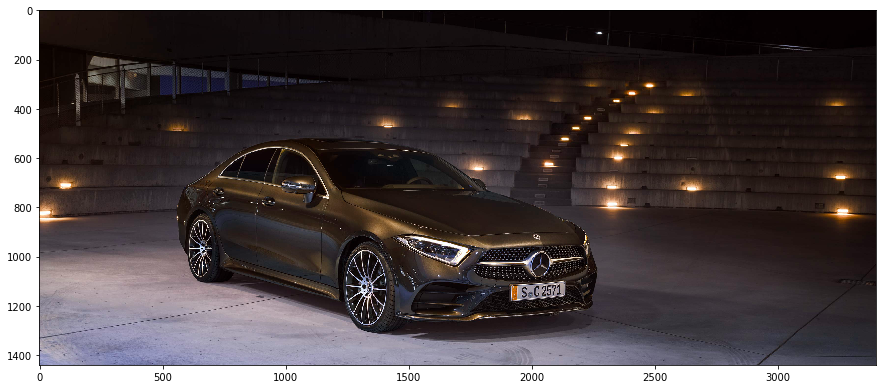

In [396]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 22
plt.imshow(car)

In [397]:
car.shape

(1440, 3400, 3)

**Testing for 3 filters only**

(1, 1440, 3400, 3)
(1, 1438, 3398, 3)
(1438, 3398, 3)


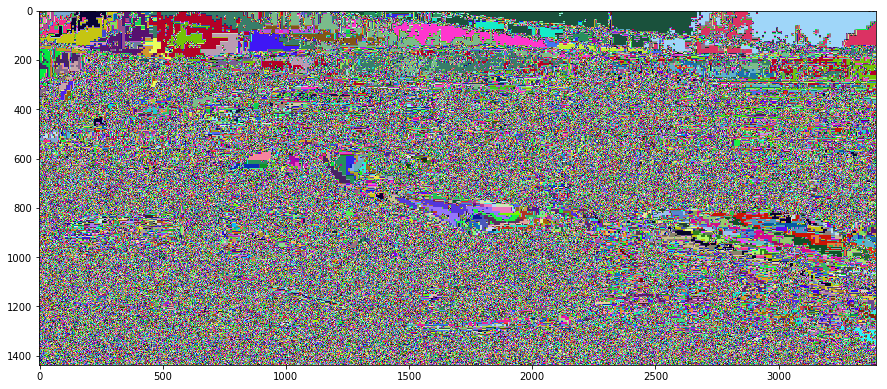

In [398]:
model = Sequential()
model.add(Conv2D(3 ,(3,3),input_shape=(1440,3400,3)))

car = car.reshape(1,1440,3400,3)
print(car.shape)
conv_car = model.predict(car)
print(conv_car.shape)
conv_car=conv_car.reshape(conv_car.shape[1:])
conv_car = np.absolute(conv_car)
print(conv_car.shape)
plt.imshow(conv_car)

In [399]:
car = cv2.imread(r'C:/Users/RV/Desktop/DESKTOP DATA/PICS/mercedes cls 2018.jpg')
temp=car

**Changing the default strides but no major difference in noise**

(1, 1440, 3400, 3)
(1, 1438, 3398, 3)
(1438, 3398, 3)


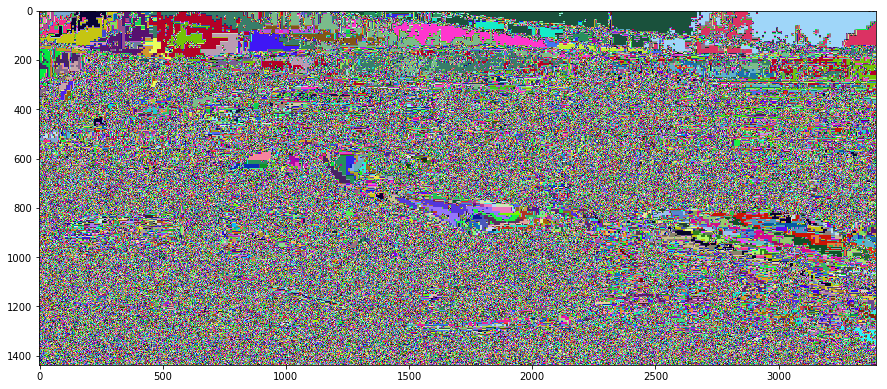

In [400]:
modelx = Sequential()
modelx.add(Conv2D(3,(6,6), input_shape=(1440,3400,3) , strides=(2,2)))

car = car.reshape(1,1440,3400,3)
print(car.shape)
conv_car = model.predict(car)
print(conv_car.shape)
conv_car=conv_car.reshape(conv_car.shape[1:])
conv_car = np.absolute(conv_car)
print(conv_car.shape)
plt.imshow(conv_car)

### Increasing the number of filter a bit with default strides , now the picrure is worth looking.

### The 4D projection ot tensor of the image was converted to 2D projection. The 4D projections consisted of 4 stacked feature maps.

### Look how the bonnet shifted and the tyres are focussed.

(1, 1438, 3398, 4)
(1438, 3398, 4)
(2876, 6796)


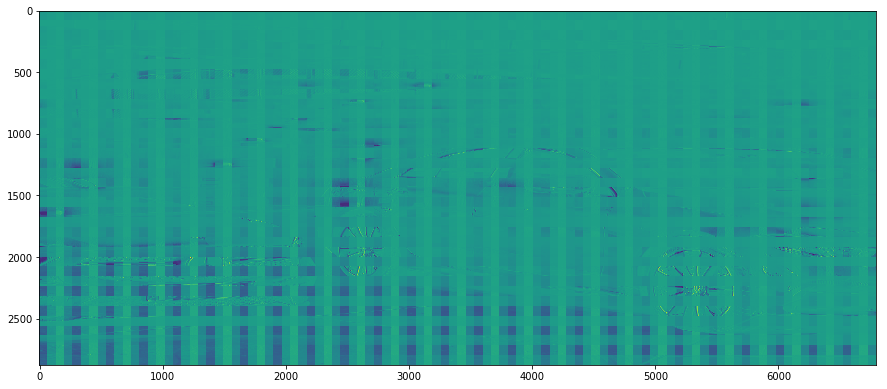

In [401]:
model = Sequential()
model.add(Conv2D(4, (3,3) , input_shape=(1440,3400,3)))

car = car.reshape(1,1440,3400,3)
conv_car_ = model.predict(car)
print(conv_car_.shape)
conv_car_=conv_car_.reshape(conv_car_.shape[1:])
print(conv_car_.shape)
conv_car_ = conv_car_.reshape((2876,6796))
print(conv_car_.shape)
plt.imshow(conv_car_)

### Now a bit closer look at the headlights, tyres , grill which have been focussed in this feature map.**

### Staircase are not focussed here currently.**

## Notice the car's number plate , how it got bigger, focussed and clearer than before.

(1, 1438, 3398, 2)
(1438, 3398, 2)
(2876, 3398)


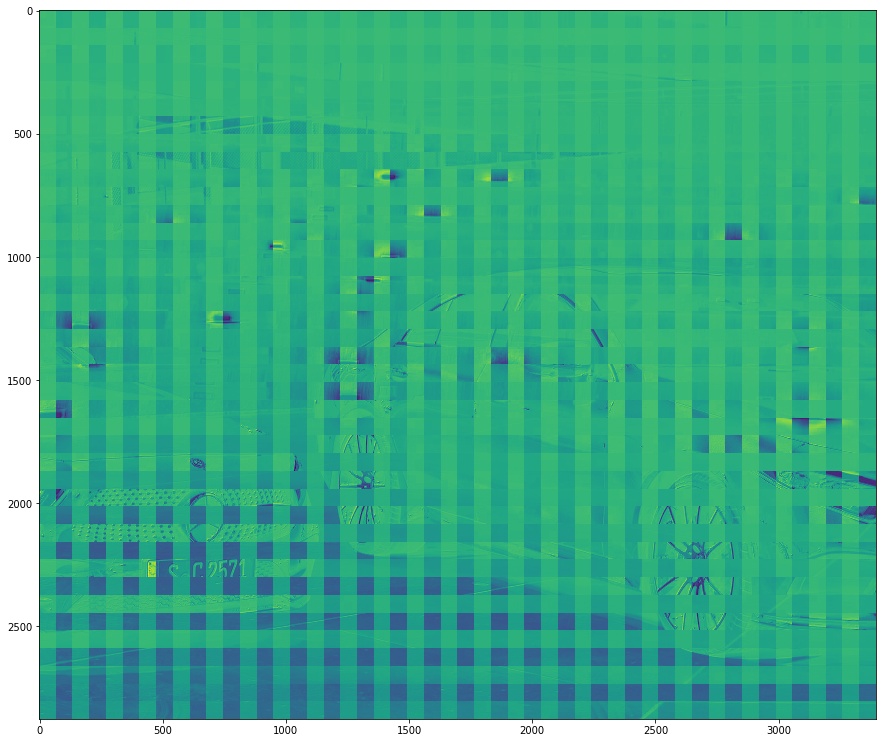

In [404]:
model = Sequential()
model.add(Conv2D(2, (3,3) , input_shape=(1440,3400,3)))

car = car.reshape(1,1440,3400,3)
conv_car_ = model.predict(car)
print(conv_car_.shape)
conv_car_=conv_car_.reshape(conv_car_.shape[1:])
print(conv_car_.shape)
conv_car_ = conv_car_.reshape((2876,3398))
print(conv_car_.shape)
plt.imshow(conv_car_)

### Now getting the activation functions into the picture (tried a bunch).

### Notice the edges of the car in the softmax and sigmoid activated feature maps.

(1, 1438, 3398, 2)
(1438, 3398, 2)
(2876, 3398)
(1, 1438, 3398, 2)
(1438, 3398, 2)
(2876, 3398)
(1, 1438, 3398, 2)
(1438, 3398, 2)
(2876, 3398)


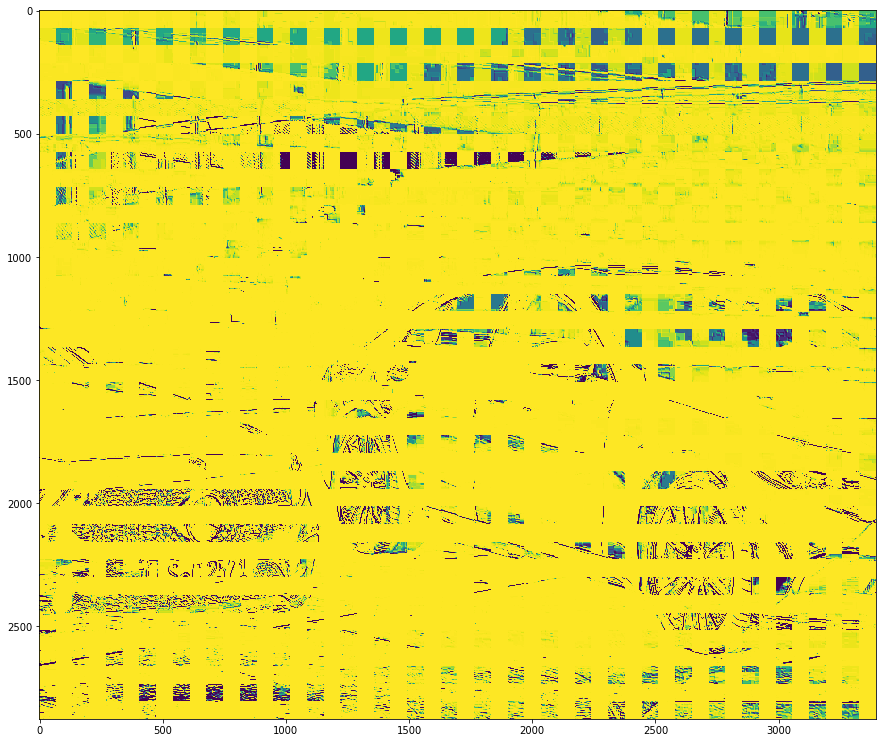

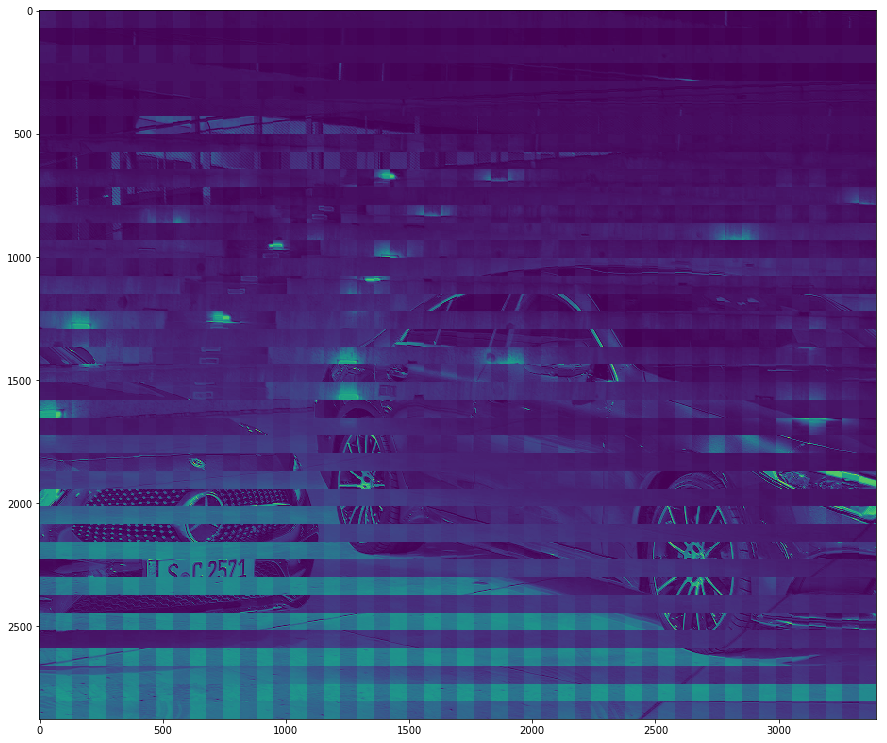

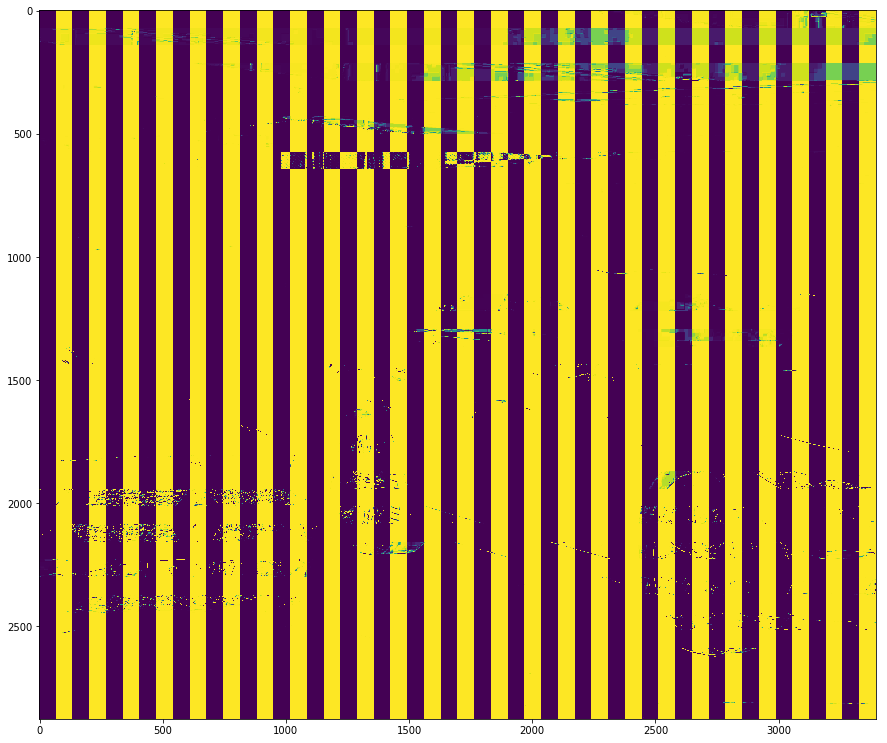

In [409]:
model1 = Sequential()
model1.add(Convolution2D(2, (3,3), input_shape=(1440,3400,3)))
model1.add(Activation('sigmoid'))
model2 = Sequential()
model2.add(Convolution2D(2, (3,3), input_shape=(1440,3400,3)))
model2.add(Activation('relu'))
model3 = Sequential()
model3.add(Convolution2D(2, (3,3), input_shape=(1440,3400,3)))
model3.add(Activation('softmax'))
dic={'0':model1,'1':model2,'2':model3}
for i in range(3):
    car = car.reshape(1,1440,3400,3)
    conv_car_ = dic[str(i)].predict(car)
    print(conv_car_.shape)
    conv_car_=conv_car_.reshape(conv_car_.shape[1:])
    print(conv_car_.shape)
    conv_car_ = conv_car_.reshape((2876,3398))
    print(conv_car_.shape)
    plt.figure()
    plt.imshow(conv_car_)

### Maxpooling of size (5,5) taken for this test. The image got smoothened up.

(1, 287, 679, 2)
(287, 679, 2)
(574, 679)


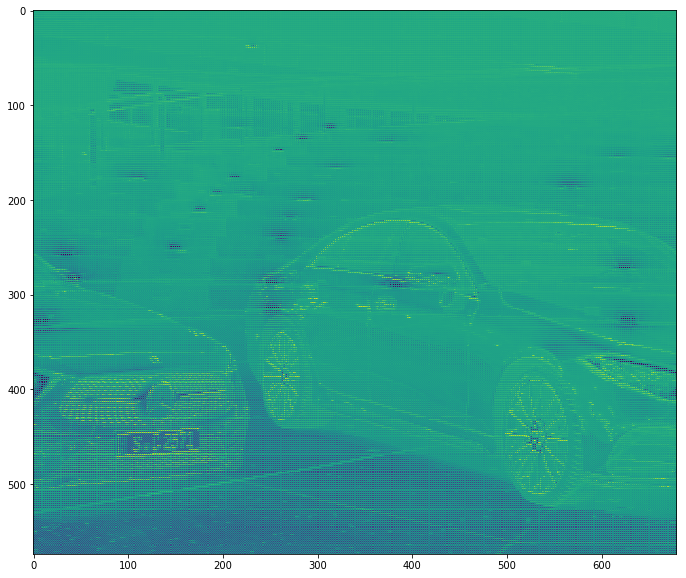

In [411]:
model = Sequential()
model.add(Conv2D(2, (3,3) , input_shape=(1440,3400,3)))
model.add(MaxPooling2D(pool_size=(5,5)))
rcParams['figure.figsize'] = 15, 10
car = car.reshape(1,1440,3400,3)
conv_car_ = model.predict(car)
print(conv_car_.shape)
conv_car_=conv_car_.reshape(conv_car_.shape[1:])
print(conv_car_.shape)
conv_car_ = conv_car_.reshape((574,679))
print(conv_car_.shape)
plt.imshow(conv_car_)

### Now maxpooled before activation , Now the overall picture is clear but very noisy.

### Currently testing the image with a batch_size of 1 . You shall take more images to create a bigger batch_size and then test the same for Batch_Normalization() layer as well.

(1, 287, 679, 2)
(287, 679, 2)
(574, 679)


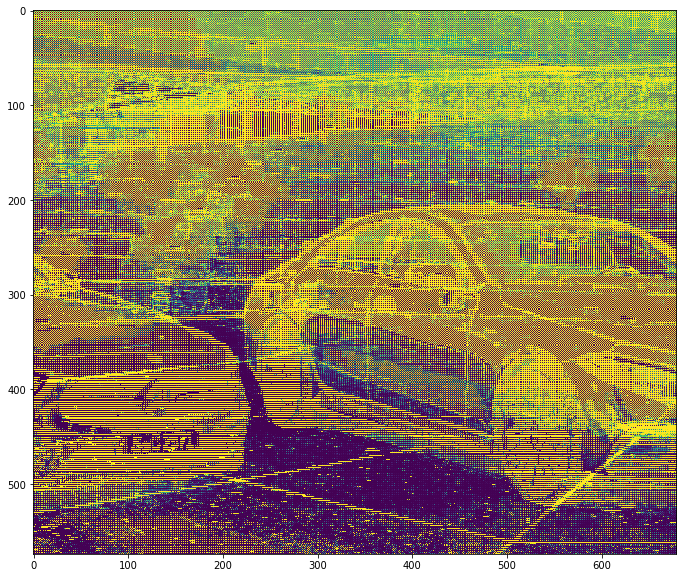

In [423]:
model = Sequential()
model.add(Conv2D(2, (3,3) , input_shape=(1440,3400,3)))
model.add(MaxPooling2D(pool_size=(5,5)))
model.add(Activation('sigmoid'))
rcParams['figure.figsize'] = 15, 10
car = car.reshape(1,1440,3400,3)
conv_car_ = model.predict(car)
print(conv_car_.shape)
conv_car_=conv_car_.reshape(conv_car_.shape[1:])
print(conv_car_.shape)
conv_car_ = conv_car_.reshape((574,679))
print(conv_car_.shape)
plt.imshow(conv_car_)